This file will initialize datas by: open, save as dataframe, clean, combine, simple visualization <br>

Using datas from 2000 to 2019, using top 100 music in billboards, find which components impact popularity of music

First, import any libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import datetime

plt.style.use('seaborn')

Open csv file as dataframe

In [2]:
df_board = pd.read_csv('data/billboardHot100_1999-2019.csv')
df_board.head()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN


In [3]:
df_00 = pd.read_csv('data/dataset-of-00s.csv')
df_00.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [4]:
df_10 = pd.read_csv('data/dataset-of-10s.csv')
df_10.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


Check whether each dataframe has any null values and type of each colunms

In [5]:
print(df_board.isna().sum())
df_board.info()

Unnamed: 0             0
Artists                0
Name                   0
Weekly.rank            0
Peak.position       7069
Weeks.on.chart      7069
Week                   0
Date               12247
Genre                  0
Writing.Credits     7213
Lyrics                 0
Features           75936
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97225 entries, 0 to 97224
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       97225 non-null  int64  
 1   Artists          97225 non-null  object 
 2   Name             97225 non-null  object 
 3   Weekly.rank      97225 non-null  int64  
 4   Peak.position    90156 non-null  float64
 5   Weeks.on.chart   90156 non-null  float64
 6   Week             97225 non-null  object 
 7   Date             84978 non-null  object 
 8   Genre            97225 non-null  object 
 9   Writing.Credits  90012 non-null  object 
 10  Lyrics           9722

In [6]:
df_00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             5872 non-null   object 
 1   artist            5872 non-null   object 
 2   uri               5872 non-null   object 
 3   danceability      5872 non-null   float64
 4   energy            5872 non-null   float64
 5   key               5872 non-null   int64  
 6   loudness          5872 non-null   float64
 7   mode              5872 non-null   int64  
 8   speechiness       5872 non-null   float64
 9   acousticness      5872 non-null   float64
 10  instrumentalness  5872 non-null   float64
 11  liveness          5872 non-null   float64
 12  valence           5872 non-null   float64
 13  tempo             5872 non-null   float64
 14  duration_ms       5872 non-null   int64  
 15  time_signature    5872 non-null   int64  
 16  chorus_hit        5872 non-null   float64


In [7]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6398 non-null   object 
 1   artist            6398 non-null   object 
 2   uri               6398 non-null   object 
 3   danceability      6398 non-null   float64
 4   energy            6398 non-null   float64
 5   key               6398 non-null   int64  
 6   loudness          6398 non-null   float64
 7   mode              6398 non-null   int64  
 8   speechiness       6398 non-null   float64
 9   acousticness      6398 non-null   float64
 10  instrumentalness  6398 non-null   float64
 11  liveness          6398 non-null   float64
 12  valence           6398 non-null   float64
 13  tempo             6398 non-null   float64
 14  duration_ms       6398 non-null   int64  
 15  time_signature    6398 non-null   int64  
 16  chorus_hit        6398 non-null   float64


### data cleaning

Based on given information, start to clean and organize data

datas from df_00 and df_10 (datas from spotify) has featuring information while billboard title does not have it <br>
check for clearfication

In [8]:
print([word for word in df_board['Name'] if word.find("feat") != -1])

['Undefeated', 'Undefeated', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather', 'Shake Ya Tailfeather']


remove featuring information from df_00 and df_10

In [9]:
# there are few ways of including featuring information

df_00['track'] = list(map(lambda x: x.split('(feat.', 1)[0], df_00['track']))
df_00['track'] = list(map(lambda x: x.split('[feat.', 1)[0], df_00['track']))
df_00['track'] = list(map(lambda x: x.split('feat.', 1)[0], df_00['track']))
df_00.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [10]:
# check whether title that has feat but not featuring is still included 
# while removing featuring information

print([word for word in df_00['track'] if word.find("feat") != -1])

['Shake Ya Tailfeather']


In [11]:
# there are more music that has different variation of including featuring information

df_10['track'] = list(map(lambda x: x.split('(feat.', 1)[0], df_10['track']))
df_10['track'] = list(map(lambda x: x.split('feat.', 1)[0], df_10['track']))
df_10['track'] = list(map(lambda x: x.split('[feat.', 1)[0], df_10['track']))
df_10['track'] = list(map(lambda x: x.split('featuring', 1)[0], df_10['track']))
df_10['track'] = list(map(lambda x: x.split(' feat', 1)[0], df_10['track']))
df_10.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears,Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


checks for the row that has feat in title

In [12]:
print([word for word in df_10['track'] if word.find("feat") != -1])

['Defeated Clown']


Before merging, removing unnecessary colunms for time and space saving purpose

In [13]:
df_00 = df_00.drop(['uri'], axis = 1)
df_00.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [14]:
df_10 = df_10.drop(['uri'], axis = 1)
df_10.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears,Keys N Krates,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [15]:
df_board = df_board.drop(['Lyrics', 'Writing.Credits', 'Unnamed: 0'] , axis = 1)
df_board.head()

,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Features
0,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...",Billy Ray Cyrus
1,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,NaN
2,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...",NaN
3,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop",NaN
4,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop",NaN


change the datatype to number (float to int) and datetime

In [16]:
df_board.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97225 entries, 0 to 97224
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Artists         97225 non-null  object 
 1   Name            97225 non-null  object 
 2   Weekly.rank     97225 non-null  int64  
 3   Peak.position   90156 non-null  float64
 4   Weeks.on.chart  90156 non-null  float64
 5   Week            97225 non-null  object 
 6   Date            84978 non-null  object 
 7   Genre           97225 non-null  object 
 8   Features        21289 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 6.7+ MB


In [17]:
df_board.head()

,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Features
0,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...",Billy Ray Cyrus
1,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,NaN
2,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...",NaN
3,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop",NaN
4,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop",NaN


because peak position is all int with NaN without 0, replace NaN with 0

In [18]:
df_board['Peak.position'].value_counts()

1.0      5566
2.0      2521
3.0      2238
4.0      2041
5.0      1905
         ... 
96.0      188
97.0      183
98.0      115
99.0       71
100.0      11
Name: Peak.position, Length: 100, dtype: int64

In [19]:
df_board['Peak.position'].isna().sum()

7069

In [20]:
df_board['Peak.position'].fillna(0, inplace = True)
df_board['Peak.position'].isna().sum()

0

In [21]:
df_board['Peak.position'].value_counts()

0.0      7069
1.0      5566
2.0      2521
3.0      2238
4.0      2041
         ... 
96.0      188
97.0      183
98.0      115
99.0       71
100.0      11
Name: Peak.position, Length: 101, dtype: int64

Do the same with weeks on chart (0 weeks on chart means that it was on chart less than a week)

In [22]:
df_board['Weeks.on.chart'].isna().sum()

7069

In [23]:
df_board['Weeks.on.chart'].fillna(0, inplace = True)
df_board['Weeks.on.chart'].isna().sum()

0

In [24]:
df_board['Weeks.on.chart'].value_counts()

0.0     7153
2.0     5928
3.0     5490
4.0     5197
5.0     5000
        ... 
85.0       1
83.0       1
87.0       1
84.0       1
82.0       1
Name: Weeks.on.chart, Length: 88, dtype: int64

change to int

In [25]:
df_board.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97225 entries, 0 to 97224
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Artists         97225 non-null  object 
 1   Name            97225 non-null  object 
 2   Weekly.rank     97225 non-null  int64  
 3   Peak.position   97225 non-null  float64
 4   Weeks.on.chart  97225 non-null  float64
 5   Week            97225 non-null  object 
 6   Date            84978 non-null  object 
 7   Genre           97225 non-null  object 
 8   Features        21289 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 6.7+ MB


In [26]:
df_board['Peak.position'] = np.array(df_board['Peak.position'], int)
df_board['Weeks.on.chart'] = np.array(df_board['Weeks.on.chart'], int)
type(df_board['Weeks.on.chart'].iloc[0])

numpy.int32

change Week and date columns to datetime 

In [27]:
df_board['Week'] = pd.to_datetime(df_board['Week']).dt.date
df_board['Date'] = pd.to_datetime(df_board['Date']).dt.date

In [28]:
df_board.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97225 entries, 0 to 97224
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Artists         97225 non-null  object
 1   Name            97225 non-null  object
 2   Weekly.rank     97225 non-null  int64 
 3   Peak.position   97225 non-null  int32 
 4   Weeks.on.chart  97225 non-null  int32 
 5   Week            97225 non-null  object
 6   Date            84978 non-null  object
 7   Genre           97225 non-null  object
 8   Features        21289 non-null  object
dtypes: int32(2), int64(1), object(6)
memory usage: 5.9+ MB


### Merge

start merging at first, try merge inner join

In [29]:
print(f"""
length of df_00 before merging: {len(df_00)}
length of df_10 before merging: {len(df_10)}
""")


length of df_00 before merging: 5872
length of df_10 before merging: 6398



In [30]:
# split the board into date match with df_00 and df_10

df_board_00 = df_board[(df_board['Week'] > datetime.date(1999, 12, 31)) & (df_board['Week'] < datetime.date(2010, 1, 1))]
df_board_10 = df_board[df_board['Week'] > datetime.date(2009, 12, 31)]
df_board_10.tail()

,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Features
46875,LMFAO,Shots,96,96,3,2010-01-07,2009-07-07,Rap,Lil Jon
46876,Lady Antebellum,American Honey,97,0,0,2010-01-07,2010-01-11,"Country,Rock",NaN
46877,Beyonce,Video Phone,98,65,5,2010-01-07,2009-09-22,"Crunk,R&;B,Pop",Lady Gaga
46878,Lifehouse,Halfway Gone,99,91,3,2010-01-07,2009-10-27,Rock,NaN
46879,Thirty Seconds To Mars,Kings And Queens,100,82,5,2010-01-07,2009-12-04,"Alternative Rock,Alternative,Rock",NaN


In [31]:
df_00_merged = df_00.merge(df_board_00, left_on = 'track', right_on = 'Name')
df_10_merged = df_10.merge(df_board_10, left_on = 'track', right_on = 'Name')

In [32]:
print(f"""
length of df_00 after merging: {len(df_00_merged)}
length of df_10 after merging: {len(df_10_merged)}
""")


length of df_00 after merging: 50650
length of df_10 after merging: 52514



remove duplicates columns such as name of music and artists

In [33]:
print(df_00_merged.columns)

Index(['track', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'Artists', 'Name', 'Weekly.rank', 'Peak.position',
       'Weeks.on.chart', 'Week', 'Date', 'Genre', 'Features'],
      dtype='object')


In [34]:
df_00_merged.drop(['Artists', 'Name'], axis = 1, inplace = True)
df_10_merged.drop(['Artists', 'Name'], axis = 1, inplace = True)
df_00_merged.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Features
0,Lucky Man,Montgomery Gentry,0.578,0.471,4,-7.27,1,0.0289,0.368,0.0,...,30.88059,13,1,95,65,17,2007-08-22,2007-01-29,Country,NaN
1,Lucky Man,Montgomery Gentry,0.578,0.471,4,-7.27,1,0.0289,0.368,0.0,...,30.88059,13,1,85,65,16,2007-08-15,2007-01-29,Country,NaN
2,Lucky Man,Montgomery Gentry,0.578,0.471,4,-7.27,1,0.0289,0.368,0.0,...,30.88059,13,1,79,65,15,2007-08-08,2007-01-29,Country,NaN
3,Lucky Man,Montgomery Gentry,0.578,0.471,4,-7.27,1,0.0289,0.368,0.0,...,30.88059,13,1,83,65,14,2007-08-01,2007-01-29,Country,NaN
4,Lucky Man,Montgomery Gentry,0.578,0.471,4,-7.27,1,0.0289,0.368,0.0,...,30.88059,13,1,80,65,13,2007-07-25,2007-01-29,Country,NaN


the number after merge increase because there are multiple duplicates for the musics which were in top 100 billboard for multiple weeks

find the size of data without duplicates for reference purpose

In [35]:
df_tmp1 = df_00_merged.drop_duplicates(subset = ['track', 'artist', 'Date'], keep = 'first').reset_index(drop = True)
df_tmp2 = df_10_merged.drop_duplicates(subset = ['track', 'artist', 'Date'], keep = 'first').reset_index(drop = True)

print(f"""
length of df_00 with duplicates: {len(df_00_merged)}
length of df_10 with duplicates: {len(df_10_merged)}

length of df_00 without duplicates: {len(df_tmp1)}
length of df_10 without duplicates: {len(df_tmp2)}
""")



length of df_00 with duplicates: 50650
length of df_10 with duplicates: 52514

length of df_00 without duplicates: 3051
length of df_10 without duplicates: 3541



In [36]:
df_tmp1.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Features
0,Lucky Man,Montgomery Gentry,0.578,0.471,4,-7.270,1,0.0289,0.3680,0.0,...,30.88059,13,1,95,65,17,2007-08-22,2007-01-29,Country,NaN
1,On The Hotline,Pretty Ricky,0.704,0.854,10,-5.477,0,0.1830,0.0185,0.0,...,41.51106,10,1,98,12,19,2007-05-16,NaT,Rap,NaN
2,Where I Come From,Alan Jackson,0.726,0.631,11,-8.136,0,0.0334,0.2200,0.0,...,35.59732,10,1,94,34,20,2002-01-01,2001-07-09,Country,NaN
3,Nothin' To Die For,Tim McGraw,0.481,0.786,10,-5.654,1,0.0288,0.0538,0.0,...,19.65701,11,1,90,68,11,2009-05-07,2007-03-27,"Country,Rock",NaN
4,Amarillo Sky,Jason Aldean,0.491,0.776,2,-3.887,1,0.0393,0.3140,0.0,...,37.86861,9,1,87,59,20,2007-03-07,2006-06-26,Country,NaN


Because there are many information that loses if we remove duplicates, so keep the data without removing the duplicates
important information loses: weekly rank (changes every week even if it stays on chart for multiple weeks)

save the data (that will be used in other file) as csv file 

In [37]:
# save the data that is merged with duplicates music
df_00_merged.to_csv('data/df_00.csv', index = False)
df_10_merged.to_csv('data/df_10.csv', index = False)

### Simple visualization

After simple data organization, display simple visualization for reference

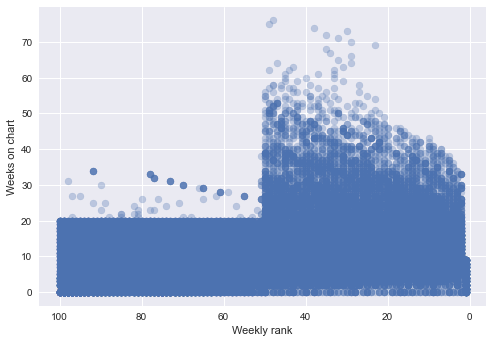

In [38]:
fig, ax = plt.subplots()

ax.scatter(df_00_merged['Weekly.rank'], df_00_merged['Weeks.on.chart'], alpha = 0.3)
ax.set_xlabel("Weekly rank")
ax.set_ylabel("Weeks on chart")
# as weekly rank = 0 is higher than weekly rank 100, flip x axis
ax.invert_xaxis()
plt.show()

due to datasize, cannot see the relationship, select random values

In [39]:
len(df_00_merged['Weekly.rank'])

50650

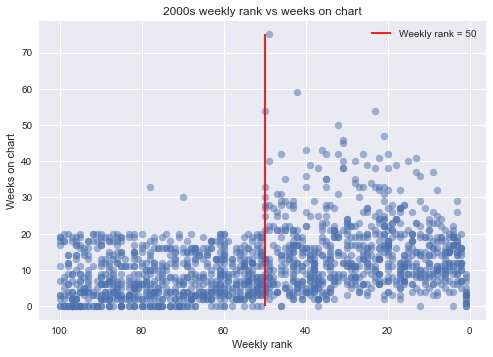

In [40]:
df_00_random_samp = df_00_merged.sample(1500)

fig, ax = plt.subplots()

ax.scatter(df_00_random_samp['Weekly.rank'], df_00_random_samp['Weeks.on.chart'], alpha = 0.5)
ax.vlines(50, 0,np.max(df_00_random_samp['Weeks.on.chart']), label = "Weekly rank = 50", colors = 'red')
ax.legend(loc = "upper right")
ax.set_xlabel("Weekly rank")
ax.set_ylabel("Weeks on chart")
ax.set_title("2000s weekly rank vs weeks on chart")
ax.invert_xaxis()
plt.show()


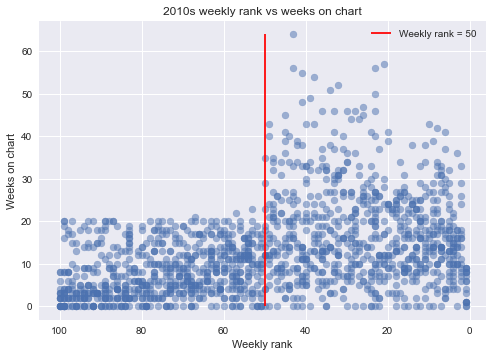

In [41]:
df_10_random_samp = df_10_merged.sample(1500)

fig, ax = plt.subplots()

ax.scatter(df_10_random_samp['Weekly.rank'], df_10_random_samp['Weeks.on.chart'], alpha = 0.5)
ax.vlines(50, 0,np.max(df_10_random_samp['Weeks.on.chart']), label = "Weekly rank = 50", colors = 'red')
ax.legend(loc = "upper right")
ax.set_xlabel("Weekly rank")
ax.set_ylabel("Weeks on chart")
ax.set_title("2010s weekly rank vs weeks on chart")
ax.invert_xaxis()
plt.show()


in general, it has to be greater than 50 in weekly rank to stay more weeks on chart

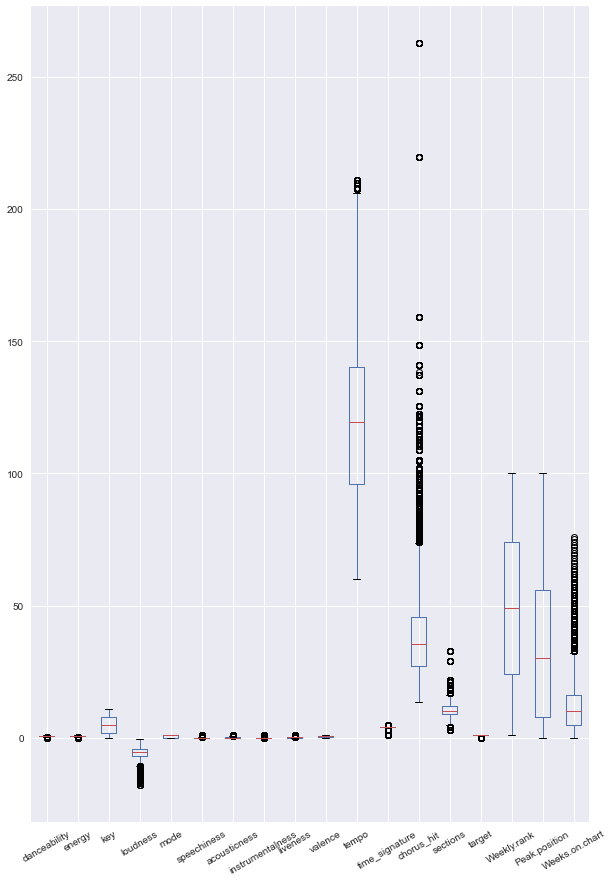

In [42]:
fig, ax = plt.subplots(figsize = (10,15))

df_00_merged.drop('duration_ms', axis = 1).boxplot(ax = ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

plt.show()

In [43]:
# to make it easier to see, only display values between 0 to 1
df_00_merged.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart
count,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000,50650.000000
mean,0.625016,0.708420,5.283455,-5.750286,0.676979,0.092442,0.150978,0.010415,0.176827,0.542723,120.767529,241178.762784,3.970661,39.158387,10.505962,0.968470,49.400513,33.994551,11.514018
std,0.148942,0.165561,3.529707,2.096550,0.467635,0.096355,0.188403,0.075557,0.133689,0.225449,29.494411,46514.277785,0.244605,18.015989,2.474002,0.174747,28.810933,27.611433,8.767081
min,0.113000,0.107000,0.000000,-17.735000,0.000000,0.022400,0.000002,0.000000,0.019300,0.038800,59.972000,61587.000000,1.000000,13.552980,3.000000,0.000000,1.000000,0.000000,0.000000
25%,0.521000,0.599000,2.000000,-6.852000,0.000000,0.033300,0.014200,0.000000,0.090600,0.361000,96.100000,213760.000000,4.000000,27.098630,9.000000,1.000000,24.000000,8.000000,5.000000
50%,0.627000,0.729000,5.000000,-5.460000,1.000000,0.047100,0.069700,0.000000,0.126000,0.548000,119.603000,236107.000000,4.000000,35.306810,10.000000,1.000000,49.000000,30.000000,10.000000
75%,0.727000,0.842000,8.000000,-4.304000,1.000000,0.107000,0.230000,0.000022,0.232000,0.721000,140.095000,261027.000000,4.000000,45.776670,12.000000,1.000000,74.000000,56.000000,16.000000
max,0.986000,0.996000,11.000000,-0.559000,1.000000,0.941000,0.994000,0.982000,0.985000,0.978000,210.857000,992160.000000,5.000000,262.615400,33.000000,1.000000,100.000000,100.000000,76.000000


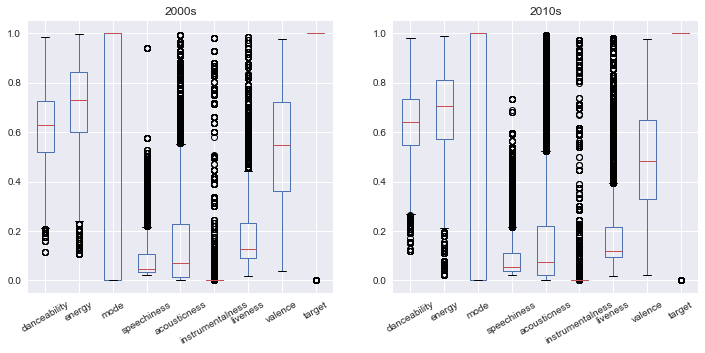

In [44]:
fig,(ax1, ax2) = plt.subplots(figsize = (12,5), ncols = 2)

df_00_merged.boxplot(column=['danceability', 'energy', 'mode', 
                             'speechiness', 'acousticness', 
                             'instrumentalness', 'liveness', 
                             'valence', 'target'], ax = ax1)

df_10_merged.boxplot(column=['danceability', 'energy', 'mode', 
                             'speechiness', 'acousticness', 
                             'instrumentalness', 'liveness', 
                             'valence', 'target'], ax = ax2)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 30)
ax1.set_title("2000s")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 30)
ax2.set_title("2010s")

plt.show()

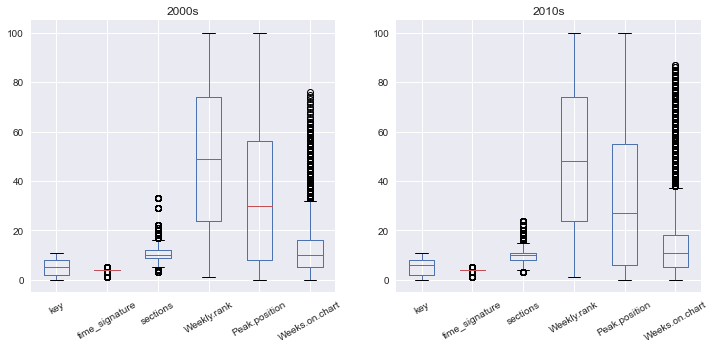

In [45]:
# display values that does not goes from 0 to 1

fig,(ax1, ax2) = plt.subplots(figsize = (12,5), ncols = 2)

df_00_merged.boxplot(column=['key', 'time_signature', 'sections', 
                             'Weekly.rank','Peak.position', 'Weeks.on.chart'], ax = ax1)

df_10_merged.boxplot(column=['key', 'time_signature', 'sections', 
                             'Weekly.rank','Peak.position', 'Weeks.on.chart'], ax = ax2)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 30)
ax1.set_title("2000s")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 30)
ax2.set_title("2010s")

plt.show()

In [46]:
df_00_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50650 entries, 0 to 50649
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             50650 non-null  object 
 1   artist            50650 non-null  object 
 2   danceability      50650 non-null  float64
 3   energy            50650 non-null  float64
 4   key               50650 non-null  int64  
 5   loudness          50650 non-null  float64
 6   mode              50650 non-null  int64  
 7   speechiness       50650 non-null  float64
 8   acousticness      50650 non-null  float64
 9   instrumentalness  50650 non-null  float64
 10  liveness          50650 non-null  float64
 11  valence           50650 non-null  float64
 12  tempo             50650 non-null  float64
 13  duration_ms       50650 non-null  int64  
 14  time_signature    50650 non-null  int64  
 15  chorus_hit        50650 non-null  float64
 16  sections          50650 non-null  int64 

display different bar graph based on the weeks on chart

In [47]:
df_00_merged['Weeks.on.chart'].value_counts()

0     3011
2     2936
3     2863
4     2788
5     2696
      ... 
72       1
73       1
74       1
75       1
76       1
Name: Weeks.on.chart, Length: 77, dtype: int64

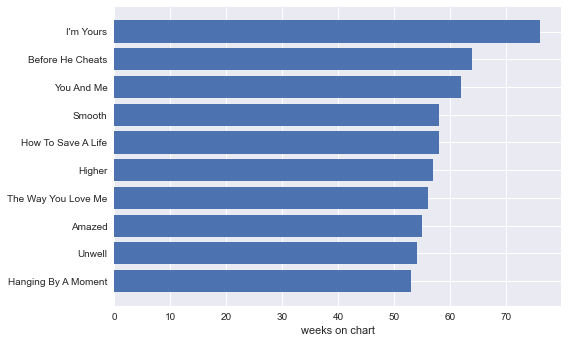

In [48]:
# when finding the general demonstration of each weeks based on each track or artist
# used the dataframe without duplicates, but when drawing a visualization (plot)
# for a specific artist or track, use the one with duplicates for better answer

df_tmp3 = df_tmp1.sort_values(by=['Weeks.on.chart'], ascending = False)

plt.barh(y = df_tmp3['track'][:10], width = df_tmp3['Weeks.on.chart'][:10])
plt.xlabel("weeks on chart")
plt.gca().invert_yaxis()
plt.show()

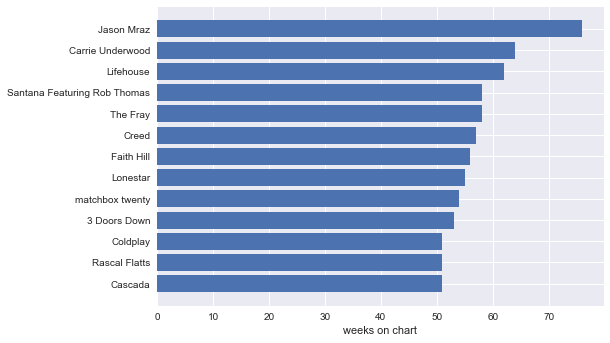

In [49]:
df_tmp3 = df_tmp1.sort_values(by=['Weeks.on.chart'], ascending = False)

plt.barh(y = df_tmp3['artist'][:15], width = df_tmp3['Weeks.on.chart'][:15])
plt.xlabel("weeks on chart")
plt.gca().invert_yaxis()
plt.show()

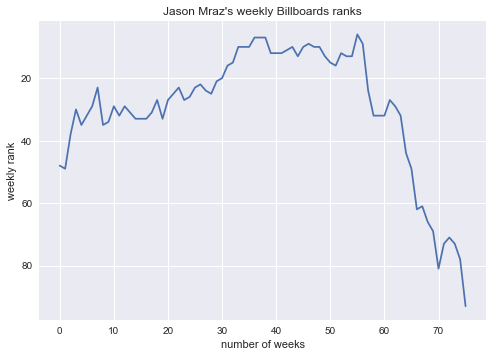

In [50]:
df_tmp4 = df_00_merged[df_00_merged['artist'] == 'Jason Mraz']
df_tmp4.reset_index(inplace = True)
plt.plot(df_tmp4['Weekly.rank'])
plt.ylabel("weekly rank")
plt.xlabel("number of weeks")
plt.title("Jason Mraz's weekly Billboards ranks")

# for weekly rank, higher means more popylar, flip the y axis
plt.gca().invert_yaxis() 
plt.show()

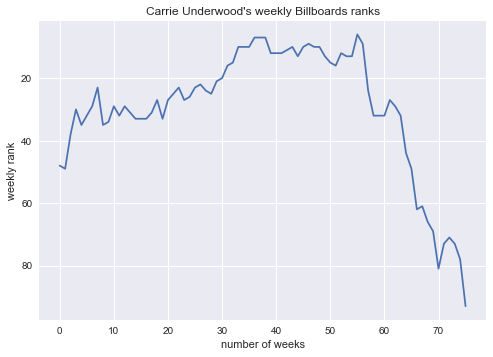

In [51]:
df_tmp5 = df_00_merged[df_00_merged['artist'] == 'Carrie Underwood']
df_tmp5.reset_index(inplace = True)
plt.plot(df_tmp4['Weekly.rank'])
plt.ylabel("weekly rank")
plt.xlabel("number of weeks")
plt.title("Carrie Underwood's weekly Billboards ranks")
plt.gca().invert_yaxis()
plt.show()

same thing in 2010s

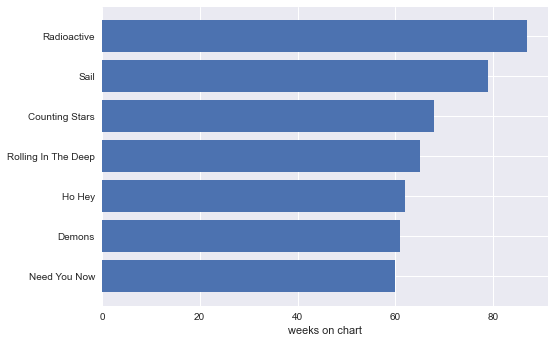

In [52]:
df_tmp6 = df_tmp2.sort_values(by=['Weeks.on.chart'], ascending = False)

plt.barh(y = df_tmp6['track'][:10], width = df_tmp6['Weeks.on.chart'][:10])
plt.xlabel("weeks on chart")
plt.gca().invert_yaxis()
plt.show()

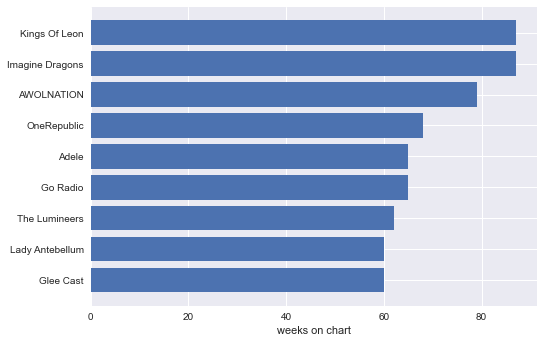

In [53]:
df_tmp7 = df_tmp2.sort_values(by=['Weeks.on.chart'], ascending = False)

plt.barh(y = df_tmp7['artist'][:10], width = df_tmp7['Weeks.on.chart'][:10])
plt.xlabel("weeks on chart")
plt.gca().invert_yaxis()
plt.show()

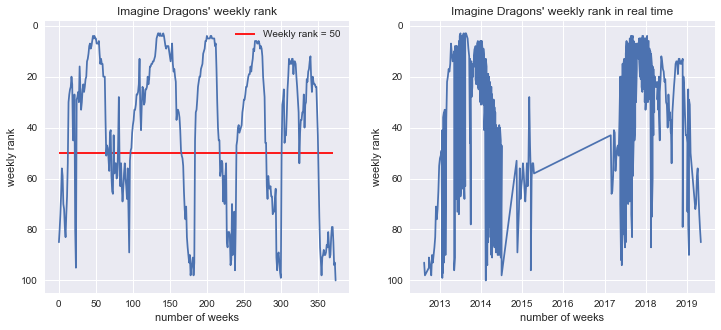

In [73]:

df_tmp8 = df_10_merged[(df_10_merged['artist'] == 'Imagine Dragons') &
                       (df_10_merged['Date'] >= datetime.date(2012, 2, 14))].reset_index()
df_10_sorted = df_10_merged.sort_values(by=['Week'], ascending = False)

fig, (ax1, ax2) = plt.subplots(figsize = (12,5), ncols = 2)

ax1.plot(df_tmp8['Weekly.rank'])
ax1.hlines(50, 0, 370, label = "Weekly rank = 50", colors = 'red')
ax1.legend(loc = "upper right")
ax1.set_ylabel("weekly rank")
ax1.set_xlabel("number of weeks")
ax1.set_title("Imagine Dragons' weekly rank")
ax1.invert_yaxis()

ax2.plot(df_10_sorted[(df_10_sorted['artist'] == 'Imagine Dragons') & 
                      (df_10_sorted['Date'] >= datetime.date(2012, 2, 14))]['Week'],
         df_10_sorted[(df_10_sorted['artist'] == 'Imagine Dragons') & 
                      (df_10_sorted['Date'] >= datetime.date(2012, 2, 14))]['Weekly.rank'])
# ax2.set_xticklabels(df_10_merged[df_10_merged['artist'] == 'Imagine Dragons']['Week'])
ax2.set_ylabel("weekly rank")
ax2.set_xlabel("number of weeks")
ax2.set_title("Imagine Dragons' weekly rank in real time")
ax2.invert_yaxis()

plt.show()

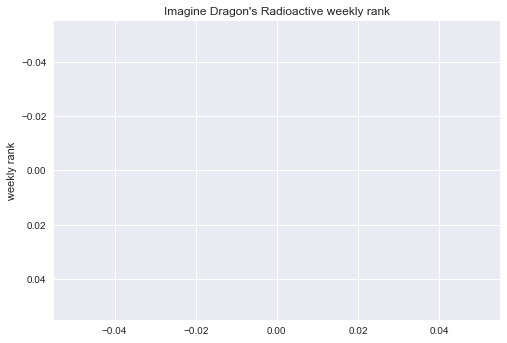

In [55]:
# there are multiple songs with same name, find the one that has been in 100 for the longest

plt.plot(df_10_sorted[(df_10_sorted['artist'] == 'Imagine Dragons') & (df_10_sorted['track'] == 'Radioactive') 
                      & (df_10_sorted['Date'] == date(2012, 2, 14).isoformat())]['Week'],
         df_10_sorted[(df_10_sorted['artist'] == 'Imagine Dragons') & (df_10_sorted['track'] == 'Radioactive') 
                      & (df_10_sorted['Date'] == date(2012, 2, 14).isoformat())]['Weekly.rank'])

plt.gca().invert_yaxis()
plt.ylabel("weekly rank")
plt.title("Imagine Dragon's Radioactive weekly rank")
plt.show()

display plot of top 5 artists and top 5 tracks based on different features

In [56]:
df_10_sort_by_weeks_on_chart = df_10_sorted.sort_values(by=['Weeks.on.chart'], ascending = False)

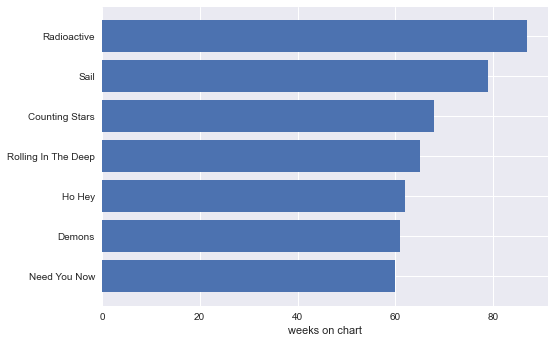

In [57]:
plt.barh(y = df_tmp6['track'][:10], width = df_tmp6['Weeks.on.chart'][:10])
plt.xlabel("weeks on chart")
plt.gca().invert_yaxis()
plt.show()

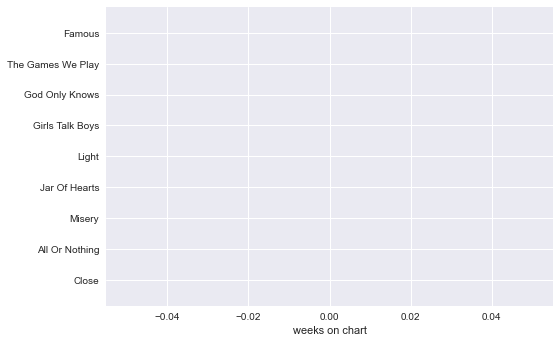

In [58]:
plt.barh(y = df_tmp6['track'][-10:], width = df_tmp6['Weeks.on.chart'][-10:])
plt.xlabel("weeks on chart")
plt.gca().invert_yaxis()
plt.show()

Last few tracks have 0 weeks on chart, remove those data

In [59]:
df_tmp9 = df_tmp6
df_tmp9 = df_tmp9[df_tmp9['Weeks.on.chart'] != 0]
# df_tmp9.drop(index = [1965, 65, 1485], inplace = True)

In [60]:
df_tmp9[df_tmp9.duplicated(['track', 'Weeks.on.chart','Date'])]

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Features
1494,Radioactive,Imagine Dragons,0.448,0.784,9,-3.686,1,0.0627,0.106000,0.000108,...,49.79873,7,1,49,3,87,2014-05-09,2012-02-14,"Adult Alternative,Dubstep,Alternative Pop,Alte...",NaN
2454,Rolling In The Deep,Go Radio,0.548,0.782,5,-4.337,1,0.0475,0.002700,0.000000,...,23.02276,9,0,49,1,65,2012-04-13,2010-11-29,"Pop,Blues,Adult Alternative,Adult Contemporary...",NaN
325,Need You Now,Glee Cast,0.550,0.677,4,-5.238,1,0.0276,0.087000,0.000000,...,35.28578,11,1,48,2,60,2010-10-14,2009-08-11,Country,NaN
1882,Shape Of You,Eat Your Heart Out,0.549,0.972,1,-4.104,0,0.0565,0.000188,0.000007,...,21.03334,12,0,24,1,59,2018-03-03,2017-01-06,"Tropical House,Dancehall,Pop,UK",NaN
75,Somebody That I Used To Know,Gotye Featuring Kimbra,0.864,0.495,0,-7.036,1,0.0370,0.591000,0.000133,...,39.56447,8,1,36,1,59,2013-03-01,2011-07-05,"Producer,Art Pop,Singer-Songwriter,Adult Alter...",Kimbra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Make It Rain,Ed Sheeran,0.618,0.239,8,-8.371,0,0.0274,0.791000,0.000000,...,44.75763,18,1,56,34,2,2014-12-26,2014-12-02,"Screen,UK,Pop",NaN
1008,Photograph,Ed Sheeran,0.614,0.379,4,-10.480,1,0.0476,0.607000,0.000464,...,35.19423,13,1,80,14,2,2018-05-12,2018-04-20,Rap,NaN
774,Famous,Mason Ramsey,0.534,0.815,5,-2.815,1,0.0278,0.708000,0.000000,...,35.74404,9,1,95,62,2,2018-05-19,2018-04-27,"Pop,Country",NaN
120,Try Me,DeJ Loaf,0.560,0.810,0,-8.029,0,0.0872,0.007100,0.000008,...,68.50717,8,1,74,26,2,2018-04-21,2018-03-30,"Canada,R&;B",NaN


In [61]:
df_tmp9.head(20).describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,0.602900,0.653150,3.900000,-5.526650,0.850000,0.046050,0.239290,0.030530,0.163055,0.414900,108.306850,231760.050000,3.950000,34.833017,10.000000,0.800000,41.650000,2.600000,63.75000
std,0.152736,0.190835,2.954034,1.710178,0.366348,0.018518,0.287432,0.136158,0.134578,0.198509,18.803033,32988.172926,0.223607,10.657318,2.427908,0.410391,10.643876,3.604091,9.46392
min,0.320000,0.264000,0.000000,-9.582000,0.000000,0.023200,0.000188,0.000000,0.052700,0.130000,78.998000,163133.000000,3.000000,21.033340,6.000000,0.000000,21.000000,1.000000,57.00000
25%,0.493000,0.487750,1.000000,-6.169500,1.000000,0.030375,0.045843,0.000000,0.098225,0.241250,95.040500,213300.750000,4.000000,24.705748,8.000000,1.000000,36.000000,1.000000,58.75000
50%,0.593000,0.664500,3.500000,-5.234500,1.000000,0.040600,0.099350,0.000000,0.117000,0.378500,107.990000,234123.000000,4.000000,35.976020,9.500000,1.000000,47.500000,1.500000,59.50000
75%,0.696000,0.782500,6.250000,-4.502000,1.000000,0.056575,0.457500,0.000114,0.169750,0.507750,123.114000,258155.500000,4.000000,42.009435,12.000000,1.000000,49.000000,2.250000,65.00000
max,0.864000,0.972000,9.000000,-3.015000,1.000000,0.083600,0.922000,0.609000,0.668000,0.931000,136.245000,281560.000000,4.000000,55.283870,14.000000,1.000000,50.000000,17.000000,87.00000


In [62]:
df_tmp9.tail(20).describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,0.676100,0.636200,4.550000,-6.319250,0.750000,0.128350,0.260107,0.017872,0.168135,0.48625,124.557800,221179.200000,3.850000,43.335666,9.700000,0.950000,88.150000,56.900000,2.0
std,0.124286,0.211242,3.379115,2.687755,0.444262,0.128355,0.325234,0.078653,0.169017,0.23926,30.390089,63490.248031,0.366348,25.264088,3.079645,0.223607,11.604332,30.043652,0.0
min,0.513000,0.155000,0.000000,-14.378000,0.000000,0.026300,0.001710,0.000000,0.067400,0.18800,72.024000,107147.000000,3.000000,21.083570,6.000000,0.000000,56.000000,14.000000,2.0
25%,0.570500,0.490750,1.750000,-7.310000,0.750000,0.031825,0.025725,0.000000,0.084925,0.25750,101.538500,194488.750000,4.000000,32.236303,8.000000,1.000000,80.000000,32.000000,2.0
50%,0.655500,0.664500,4.500000,-6.036500,1.000000,0.067400,0.092850,0.000007,0.100500,0.49550,116.403500,212966.500000,4.000000,36.880840,9.000000,1.000000,93.000000,56.500000,2.0
75%,0.773000,0.810750,8.000000,-4.477250,1.000000,0.212750,0.478750,0.000026,0.152250,0.72475,149.483500,233326.750000,4.000000,43.157977,11.000000,1.000000,95.000000,93.000000,2.0
max,0.887000,0.889000,10.000000,-2.815000,1.000000,0.376000,0.987000,0.352000,0.775000,0.90700,173.937000,404480.000000,4.000000,133.416360,18.000000,1.000000,100.000000,96.000000,2.0


In [63]:
len(df_tmp9)

3123

In [64]:
df_tmp10 = df_00_merged[df_00_merged.duplicated(subset=['track','artist'], keep=False)]

In [65]:
df_tmp10.sort_values(by=['track'], ascending = False)

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Features
38180,www.memory,Alan Jackson,0.701,0.503,5,-7.535,1,0.026,0.572,0.0,...,45.35510,7,1,49,49,6,2000-12-05,2000-10-02,Country,NaN
38172,www.memory,Alan Jackson,0.701,0.503,5,-7.535,1,0.026,0.572,0.0,...,45.35510,7,1,89,45,14,2001-01-30,2000-10-02,Country,NaN
38179,www.memory,Alan Jackson,0.701,0.503,5,-7.535,1,0.026,0.572,0.0,...,45.35510,7,1,47,47,7,2000-12-12,2000-10-02,Country,NaN
38176,www.memory,Alan Jackson,0.701,0.503,5,-7.535,1,0.026,0.572,0.0,...,45.35510,7,1,69,45,10,2001-01-02,2000-10-02,Country,NaN
38181,www.memory,Alan Jackson,0.701,0.503,5,-7.535,1,0.026,0.572,0.0,...,45.35510,7,1,50,50,5,2000-11-28,2000-10-02,Country,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49258,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,0.759,0.675,9,-5.148,0,0.313,0.228,0.0,...,35.32814,8,1,13,4,18,2003-02-18,2002-10-10,"West Coast,R&;B,Rap",NaN
49257,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,0.759,0.675,9,-5.148,0,0.313,0.228,0.0,...,35.32814,8,1,16,4,19,2003-02-25,2002-10-10,"West Coast,R&;B,Rap",NaN
49256,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,0.759,0.675,9,-5.148,0,0.313,0.228,0.0,...,35.32814,8,1,21,4,20,2003-03-04,2002-10-10,"West Coast,R&;B,Rap",NaN
49255,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,0.759,0.675,9,-5.148,0,0.313,0.228,0.0,...,35.32814,8,1,24,4,21,2003-03-11,2002-10-10,"West Coast,R&;B,Rap",NaN


In [66]:
df_tmp10 = df_tmp9[df_tmp9.duplicated(subset=['track','artist'], keep=False)]

In [67]:
df_tmp10.sort_values(by=['track'], ascending = False)

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Features
1111,Youth,Shawn Mendes Featuring Khalid,0.534,0.596,6,-6.653,0,0.1170,0.560000,0.000000,...,48.52929,9,1,100,23,18,2016-06-25,2015-11-13,Pop,NaN
1112,Youth,Troye Sivan,0.628,0.737,7,-4.437,1,0.0410,0.062500,0.000000,...,32.21224,11,1,76,65,2,2018-06-09,2018-05-03,Pop,Khalid
1110,Youth,Shawn Mendes Featuring Khalid,0.534,0.596,6,-6.653,0,0.1170,0.560000,0.000000,...,48.52929,9,1,76,65,2,2018-06-09,2018-05-03,Pop,Khalid
1113,Youth,Troye Sivan,0.628,0.737,7,-4.437,1,0.0410,0.062500,0.000000,...,32.21224,11,1,100,23,18,2016-06-25,2015-11-13,Pop,NaN
546,You,Chris Young,0.616,0.893,11,-3.588,1,0.0375,0.000937,0.000000,...,30.82453,11,1,77,58,12,2019-02-23,2018-03-30,Rap,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,Alive,Sia,0.508,0.762,6,-4.217,0,0.0489,0.254000,0.000122,...,31.44337,10,1,89,32,20,2013-07-12,2013-02-05,"Progressive House,Pop,Electronic",NaN
928,Alive,Sia,0.508,0.762,6,-4.217,0,0.0489,0.254000,0.000122,...,31.44337,10,1,99,56,3,2016-02-19,2015-09-24,"Australia,Pop",NaN
924,Alive,Dabin,0.377,0.566,11,-6.173,1,0.0440,0.134000,0.000000,...,24.00343,17,0,99,56,3,2016-02-19,2015-09-24,"Australia,Pop",NaN
1054,A Thousand Years,Christina Perri,0.421,0.407,10,-7.445,1,0.0267,0.309000,0.000961,...,52.76275,13,1,46,31,26,2012-04-27,2011-10-18,"Screen,Pop,Soundtrack",NaN


In [68]:
len(df_00)

5872